In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('src/')

In [2]:
# Set a consistent style for the plots
sns.set_theme(style="whitegrid")

In [3]:
# Prefix path
PREFIX_PATH = 'data'

In [4]:
# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display 50 rows
pd.set_option('display.max_rows', 50)

# Importing the final dataset
df = pd.read_csv(f'{PREFIX_PATH}/final_data_complete.csv')

In [5]:
from utils.methods import conv_to_dict, get_list

In [6]:
temp = pd.DataFrame(list(df['distilbert_emotions'].apply(conv_to_dict)))

In [7]:
import ast
df['Genres'] = df['Genres'].apply(ast.literal_eval)

In [8]:
emotions_df = pd.concat([df, temp], axis=1)

In [9]:
emotions_df['merge_year'] = emotions_df['merge_year'].astype("Int64")

In [11]:
emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']

In [12]:
temp = emotions_df.groupby('merge_year').agg({
    emotion: ['mean'] for emotion in emotions
})

In [14]:
temp.columns = emotions

## Can just start with 1920

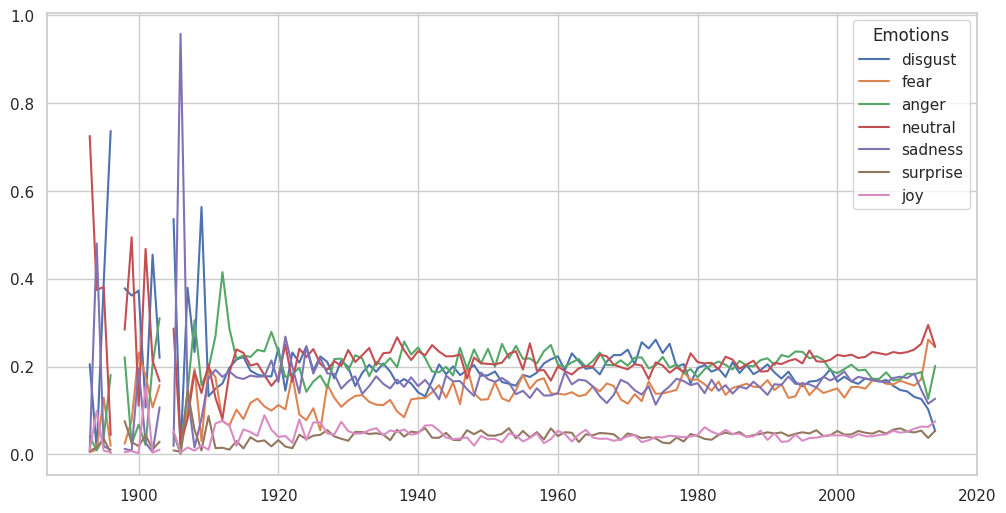

In [15]:
plt.figure(figsize=(12, 6))

for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.legend(title='Emotions', loc='best')

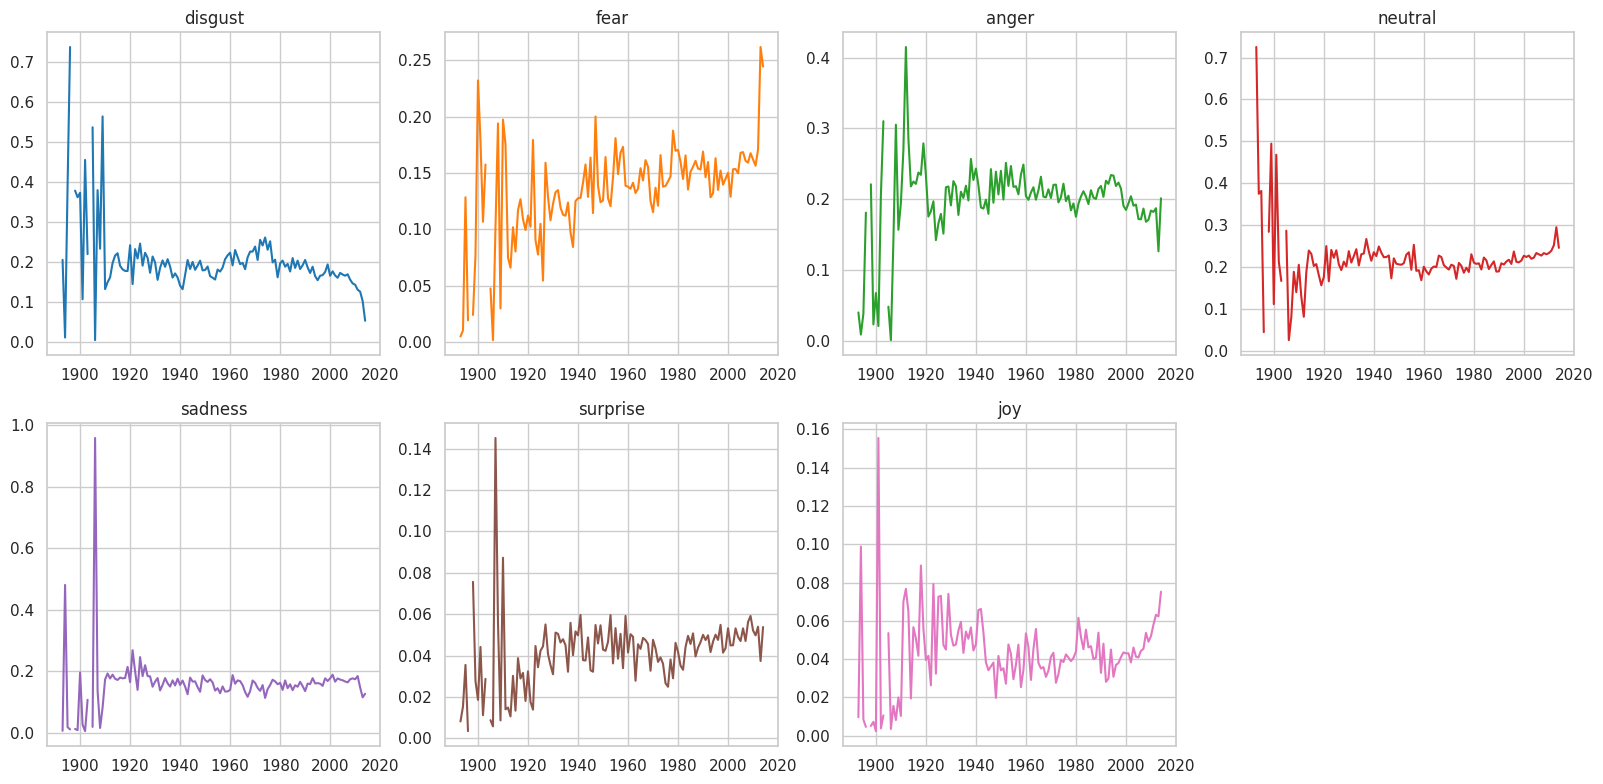

In [16]:
num_emotions = len(temp.columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
colors = sns.color_palette("tab10", len(temp.columns))

for ax, column, color in zip(axes, temp.columns, colors):
    ax.plot(temp.index, temp[column], color=color)
    ax.set_title(column)

for ax in axes[num_emotions: ]:
    ax.axis('off')

plt.tight_layout()
plt.show()

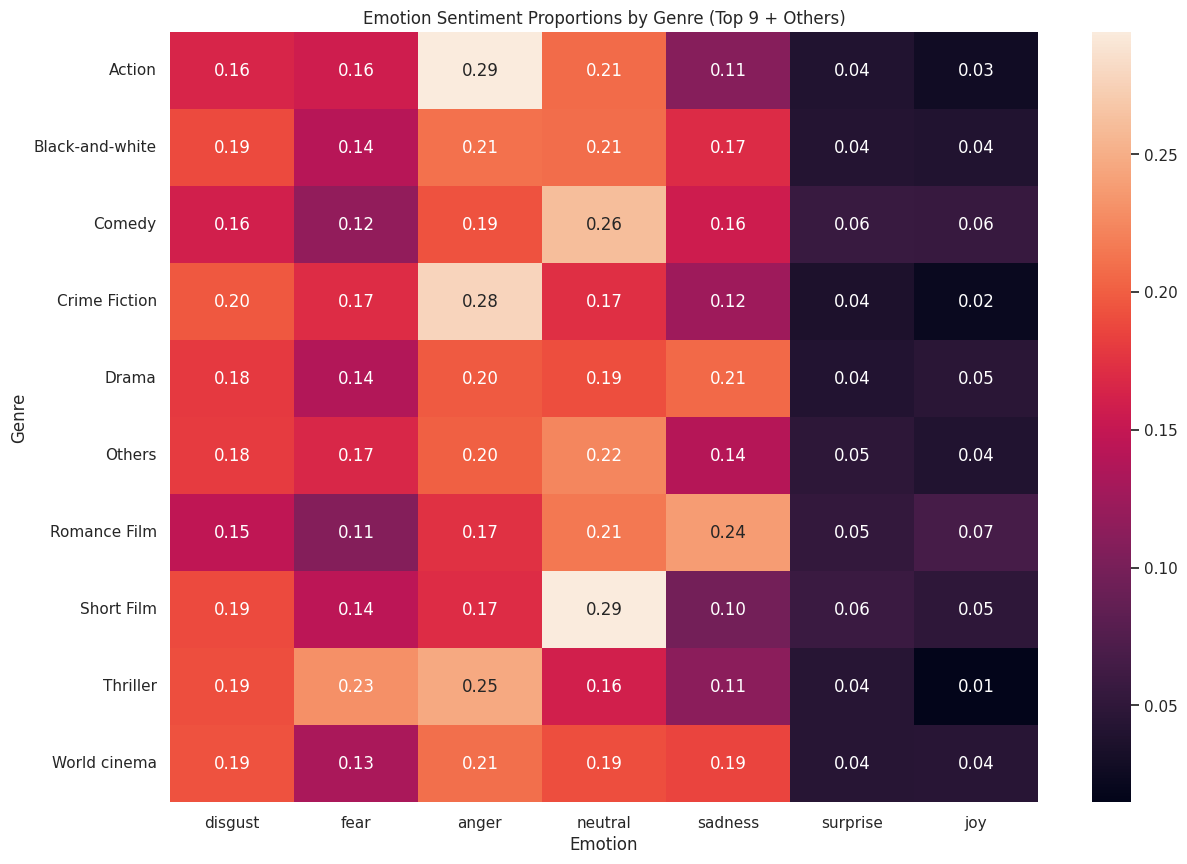

In [17]:
emotions_df = pd.DataFrame(emotions_df)

# Expand the genres into individual rows
emotions_df_expanded = emotions_df.explode('Genres')

# Count the frequency of each genre
genre_counts = emotions_df_expanded['Genres'].value_counts()

# Get the top 9 genres based on the frequency
top_genres = genre_counts.nlargest(9).index

# Calculate the mean emotion for each genre
emotion_data = emotions_df_expanded.groupby('Genres')[['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']].mean()

# Group all other genres into 'Others'
emotion_data['Genre'] = emotion_data.index
emotion_data.loc[~emotion_data['Genre'].isin(top_genres), 'Genre'] = 'Others'

# Aggregate the 'Others' genres and recalculate proportions
emotion_data_grouped = emotion_data.groupby('Genre').sum()
emotion_data_grouped = emotion_data_grouped.div(emotion_data_grouped.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(emotion_data_grouped, annot=True, fmt='.2f', cbar=True)
plt.title('Emotion Sentiment Proportions by Genre (Top 9 + Others)')
plt.ylabel('Genre')
plt.xlabel('Emotion')
plt.show()